
# ¿HAY ALGUNA RELACIÓN ENTRE SEPTIEMBRE Y LOS SISMOS?

Sismicidad del 1930-01-01 al 2023-12-14, todas las magnitudes, todas las profundidades, en todo el pais.

> Catalogo de sismos - Servicio Sismologico Nacional (SSN) | UNAM - Mexico. DOI: 10.21766/SSNMX/EC/MX
Informacion sujeta a cambios. Archivo generado el 2023-12-14 a las 15:55:00 (tiempo del centro de Mexico).



## Importación de módulos, limpieza y ordenamiento de datos.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns


In [2]:
df = pd.read_csv('SSNMX2.csv', low_memory=False)
df[['Dia', 'Mes', 'Año']] = df['Fecha'].str.split('/', expand=True)

In [3]:
df['Dia'] = df['Dia'].astype(int)
df['Mes'] = df['Mes'].astype(int)
df['Año'] = df['Año'].astype(int)

df[['Municipio', 'Estado']] = df['Referencia de localizacion'].str.split(',', expand=True)


columnasns= ['Fecha', 'Latitud','Longitud', 'Profundidad', 'Fecha UTC', 'Hora UTC', 'Estatus', 'Referencia de localizacion', 'Hora']

df.drop(columns = columnasns,axis=1, inplace = True)


In [4]:
mapa_meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

# Aplica el mapeo a la columna "Mes"
df['Mes'] = df['Mes'].map(mapa_meses)


In [5]:
df['Mes'] = df['Mes'].astype("category")
df['Municipio'] = df['Municipio'].astype("category")
df['Estado'] = df['Estado'].astype("category")

df['Estado'] = df['Estado'].str.replace(' ', '')

df = df.loc[(df['Estado'] != '') & (df['Estado'] != 'N')]

df.reset_index(drop=True, inplace=True)

df['Estado'].unique()

array(['JAL', 'OAX', 'COL', 'SON', 'GRO', 'BC', 'MICH', 'CHIS', 'VER',
       'BCS', 'PUE', 'NAY', 'SIN', 'TAB', 'CAMP', 'CDMX', 'CHIH', 'QR',
       'TAMS', 'HGO', 'SLP', 'MEX', 'QRO', 'YUC', 'MOR', 'COAH', 'TLAX',
       'GTO', 'NL', 'ZAC', 'DGO', 'AGS'], dtype=object)

In [6]:
df.dropna(inplace = True)

df['Magnitud'] = df['Magnitud'].astype(float)


df['Siniestro'] = 1


## Separación de datos entre intervalos de magnitudes.

In [7]:
majorfive= df.loc[(df['Magnitud'] >= 5)]
majorseven = df.loc[(df['Magnitud'] >= 7)]


## Siniestros históricos desde $01/01/1930$ a $14/12/2023$ de magnitud $\geq 5 $ $Mw$.

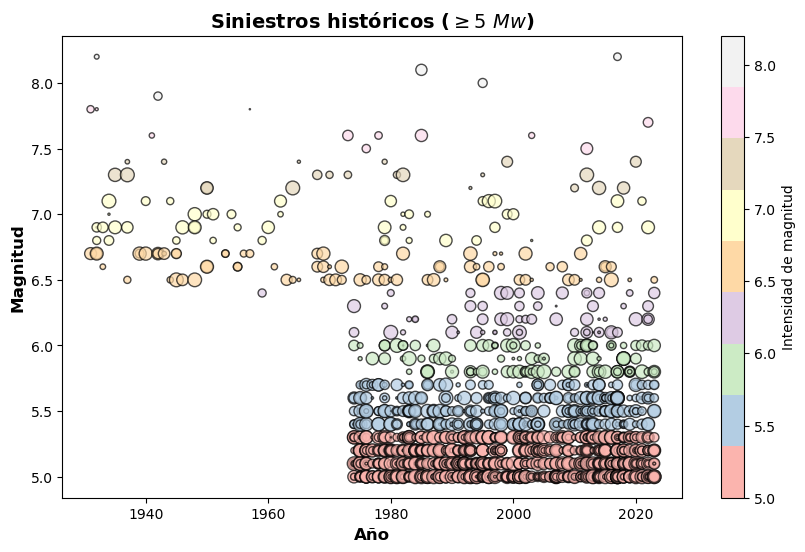

In [8]:
## Análisis de Siniestros
x = majorfive['Año']

y= majorfive['Magnitud']

# Normalizar los valores de magnitud en el rango [0, 1]
norm = Normalize(vmin=min(y), vmax=max(y))
normalized_y = norm(y)

# Crear el gráfico de dispersión con colores normalizados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=normalized_y, s=100 * np.random.rand(len(majorfive['Magnitud'])), alpha=0.7, cmap='Pastel1', edgecolors='black')

# Añadir título y etiquetas de los ejes
plt.title("Siniestros históricos ($\\geq 5 $ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Año", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Magnitud", fontsize=12, fontweight='bold', color='k')


# Crear un objeto ScalarMappable para crear la barra de colores
sm = ScalarMappable(cmap='Pastel1', norm=norm)
sm.set_array([])  # Necesario para la barra de colores

# Crear ejes para la barra de colores
cbar_axes = plt.colorbar(sm, label='Intensidad de magnitud', ax=plt.gca())

# Mostrar el gráfico
plt.show()

####


### En el gráfico de dispersión se muestra que hay una gran cantidad de datos que las estaciones sísmicas no registraron. SSN indica que se debe a la poca cobertura que se tenía en la época.

### Comenzamos por dividir la información en 2. Tomaremos la magnitud $\geq 6.5 $  $Mw$ y analizaremos la cantidad de siniestros por mes para ese intervalo.

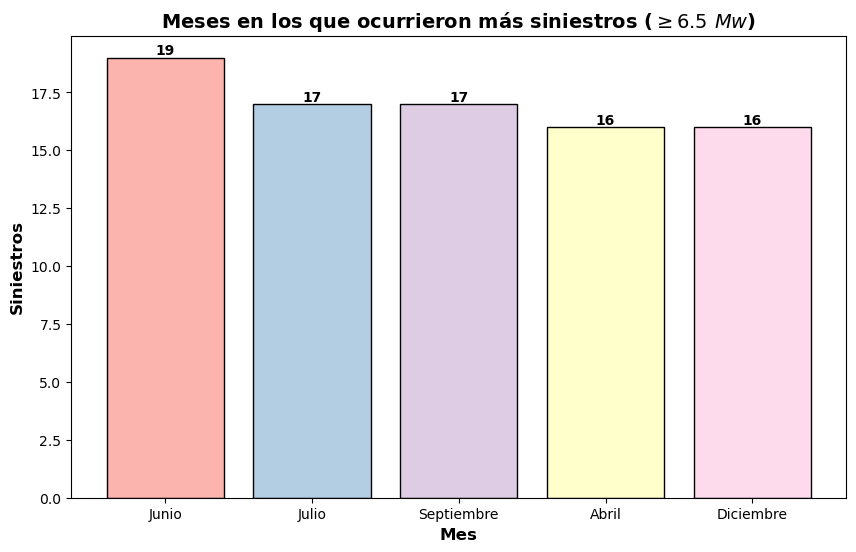

In [9]:
majorsixdotfive = df.loc[(df['Magnitud'] >= 6.5)]

topfivemonth = majorsixdotfive.groupby('Mes').Siniestro.sum().sort_values(ascending=False)

x = topfivemonth.head(5).index

y= topfivemonth.head(5).values

# Crear colores distintos para cada barra con un mapa de colores pastel
colores_pastel = plt.cm.Pastel1(np.arange(len(x)) / len(x))

# Crear un gráfico de barras con colores pastel
plt.figure(figsize=(10, 6))

# Ajustar el ancho de las barras
bar_width = 0.8

bars = plt.bar(x, y, width=bar_width, color=colores_pastel, edgecolor='black')
# Añadir títulos y etiquetas
plt.title("Meses en los que ocurrieron más siniestros ($\\geq 6.5 $ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Mes", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Siniestros", fontsize=12, fontweight='bold', color='k')
# Añadir valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

    
# Añadir descripción
# description = "Siniestros históricos desde el año $\geq 1977 $  a  $ 14/12/2023 $ Servicio Sismologico Nacional (SSN)"
# plt.text(2, -2.5, description, ha='center', va='center', color='gray', fontsize=10)

# Mostrar el gráfico
plt.show()

### Notamos que la mayor parte de los siniestros registrados de $ 01/01/1930 $  a $ 14/12/2023 $ han ocurrido en Junio, Julio y Septiembre.

### Ahora, analizaremos la época en la que más datos se tienen. Los siniestros históricos desde el año $1977 $  a $ 14/12/2023 $ debido a posible sesgo en datos por estaciones sísmicas

<Figure size 1000x800 with 0 Axes>

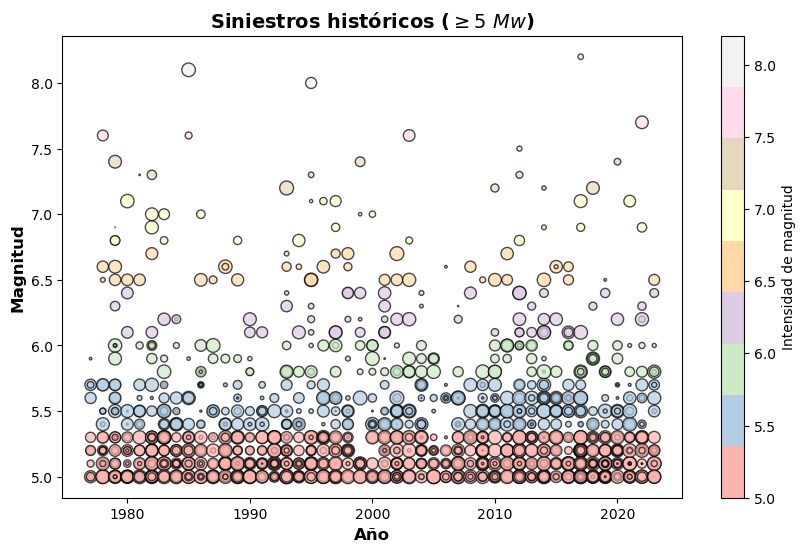

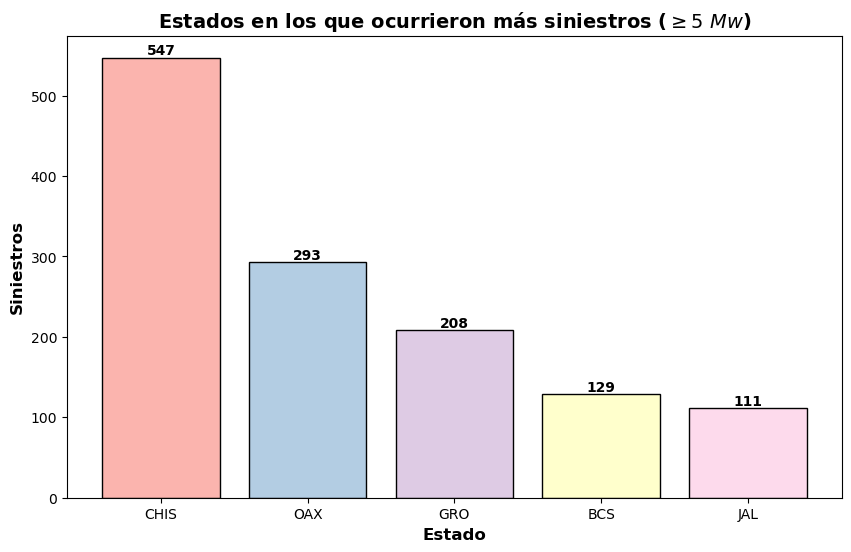

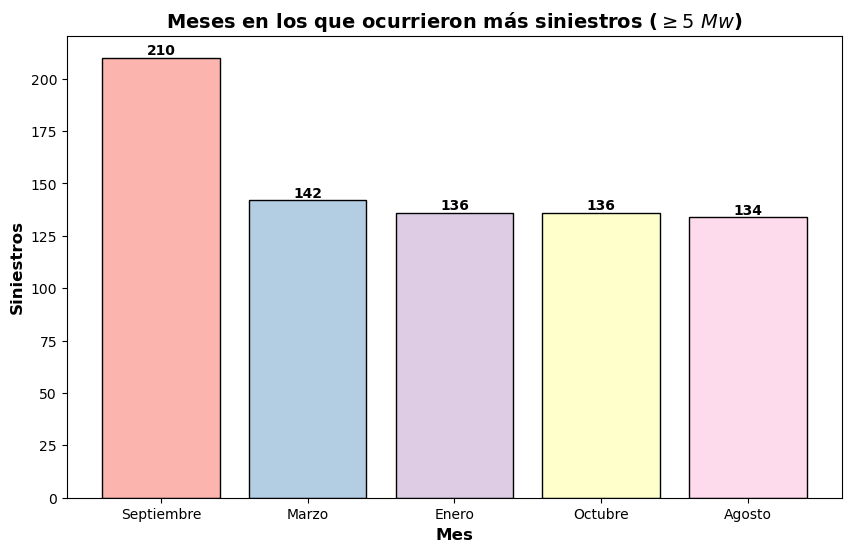

In [10]:

morethaneightys=majorfive.loc[(majorfive['Año']>= 1977)]


x = morethaneightys['Año']

y= morethaneightys['Magnitud']

plt.figure(figsize=(10, 8))
# Normalizar los valores de magnitud en el rango [0, 1]
norm = Normalize(vmin=min(y), vmax=max(y))
normalized_y = norm(y)

# Crear el gráfico de dispersión con colores normalizados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=normalized_y, s=100 * np.random.rand(len(morethaneightys['Magnitud'])), alpha=0.7, cmap='Pastel1', edgecolors='black')

# Añadir título y etiquetas de los ejes
plt.title("Siniestros históricos ($\\geq 5 $ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Año", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Magnitud", fontsize=12, fontweight='bold', color='k')


# Crear un objeto ScalarMappable para crear la barra de colores
sm = ScalarMappable(cmap='Pastel1', norm=norm)
sm.set_array([])  # Necesario para la barra de colores

# Crear ejes para la barra de colores
cbar_axes = plt.colorbar(sm, label='Intensidad de magnitud', ax=plt.gca())

# Mostrar el gráfico
plt.show()


###############


topfivestates = morethaneightys.groupby('Estado').Siniestro.sum().sort_values(ascending=False)

x = topfivestates.head(5).index

y= topfivestates.head(5).values

# Crear colores distintos para cada barra con un mapa de colores pastel
colores_pastel = plt.cm.Pastel1(np.arange(len(x)) / len(x))

# Crear un gráfico de barras con colores pastel
plt.figure(figsize=(10, 6))

# Ajustar el ancho de las barras
bar_width = 0.8

bars = plt.bar(x, y, width=bar_width, color=colores_pastel, edgecolor='black')
# Añadir títulos y etiquetas
plt.title("Estados en los que ocurrieron más siniestros ($\\geq 5 $ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Estado", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Siniestros", fontsize=12, fontweight='bold', color='k')

# Añadir valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Mostrar el gráfico
plt.show()

########

topfivemonth = morethaneightys.groupby('Mes').Siniestro.sum().sort_values(ascending=False)

x = topfivemonth.head(5).index

y= topfivemonth.head(5).values

# Crear colores distintos para cada barra con un mapa de colores pastel
colores_pastel = plt.cm.Pastel1(np.arange(len(x)) / len(x))

# Crear un gráfico de barras con colores pastel
plt.figure(figsize=(10, 6))

# Ajustar el ancho de las barras
bar_width = 0.8

bars = plt.bar(x, y, width=bar_width, color=colores_pastel, edgecolor='black')
# Añadir títulos y etiquetas
plt.title("Meses en los que ocurrieron más siniestros ($\\geq 5 $ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Mes", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Siniestros", fontsize=12, fontweight='bold', color='k')
# Añadir valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

    
# Añadir descripción
#description = "Siniestros históricos desde el año $\geq 1977 $  a  $ 14/12/2023 $ Servicio Sismologico Nacional (SSN)"
#plt.text(1.7, -30, description, ha='center', va='center', color='gray', fontsize=10)

# Mostrar el gráfico
plt.show()


####


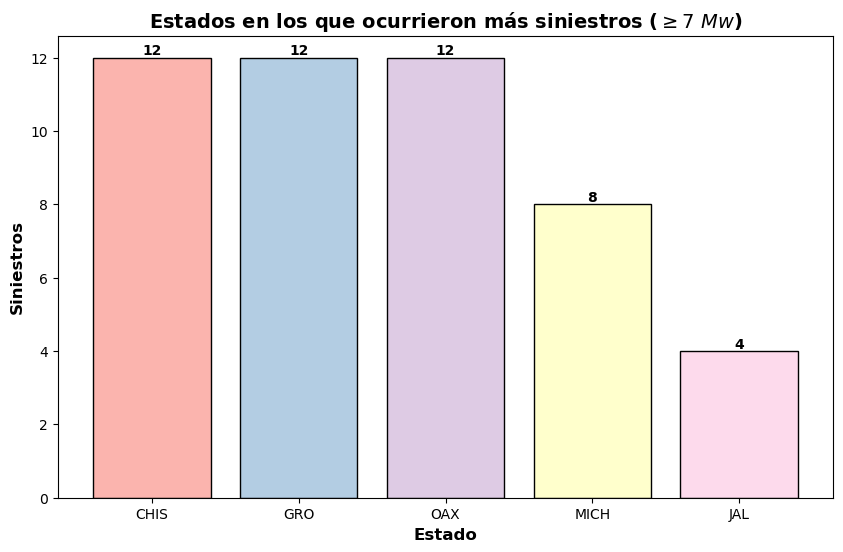

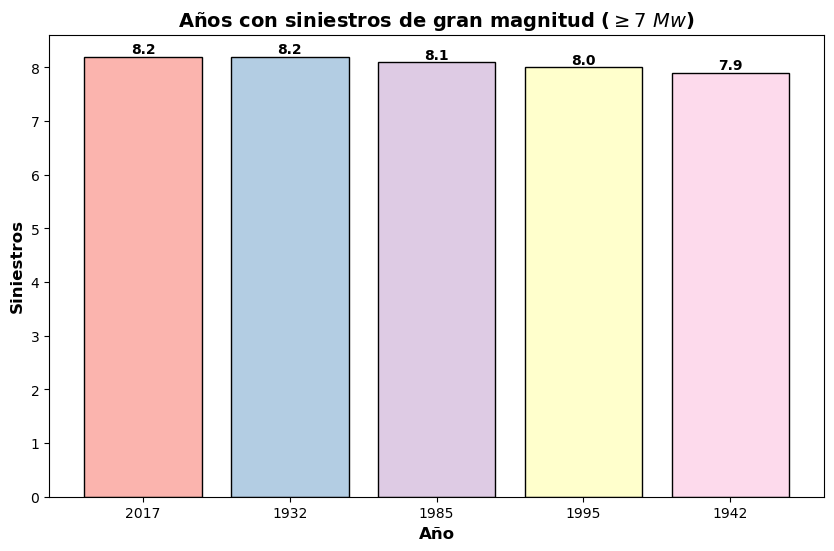

In [11]:

topfivestates = majorseven.groupby('Estado').Siniestro.sum().sort_values(ascending=False)

x = topfivestates.head(5).index

y= topfivestates.head(5).values

# Crear colores distintos para cada barra con un mapa de colores pastel
colores_pastel = plt.cm.Pastel1(np.arange(len(x)) / len(x))

# Crear un gráfico de barras con colores pastel
plt.figure(figsize=(10, 6))

# Ajustar el ancho de las barras
bar_width = 0.8

bars = plt.bar(x, y, width=bar_width, color=colores_pastel, edgecolor='black')
# Añadir títulos y etiquetas
plt.title("Estados en los que ocurrieron más siniestros ($\\geq 7 $ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Estado", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Siniestros", fontsize=12, fontweight='bold', color='k')

# Añadir valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Mostrar el gráfico
plt.show()

####

####

topfiveyear = majorseven.groupby('Año').Magnitud.max().sort_values(ascending=False)

x = topfiveyear.head(5).index

y= topfiveyear.head(5).values


topfiveyear
# Crear colores distintos para cada barra con un mapa de colores pastel
colores_pastel = plt.cm.Pastel1(np.arange(len(x)) / len(x))

# Crear un gráfico de barras con colores pastel
plt.figure(figsize=(10, 6))

# Ajustar el ancho de las barras
bar_width = 0.8

# Añadir un pequeño desplazamiento a la posición de las barras para colocarlas lado a lado
bar_positions = np.arange(len(x))

bars = plt.bar(bar_positions, y, width=bar_width, color=colores_pastel, edgecolor='black')
# Añadir títulos y etiquetas
plt.title("Años con siniestros de gran magnitud ($\\geq 7 $ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Año", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Siniestros", fontsize=12, fontweight='bold', color='k')
# Añadir valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Establecer ticks en el eje x con etiquetas de años
plt.xticks(bar_positions, x)

# Mostrar el gráfico
plt.show()


### Podemos concluir que, los estados que presentan mayor probabilidad de presentar sismos son;
1. Chiapas
2. Oaxaca
3. Guerrero

### Además, resulta interesante la comparación de diferencia en los años en los que se registraron los siniestros de gran magnitud. 

### Ahora analizaremos el estado de Colima


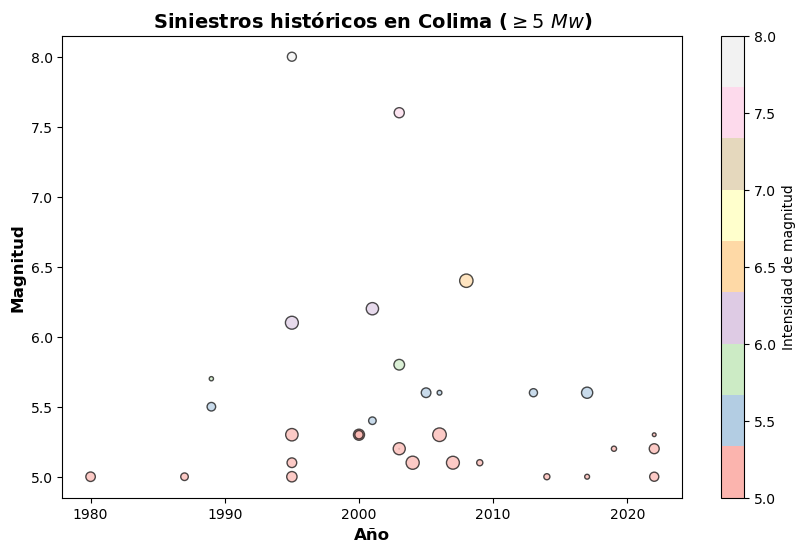

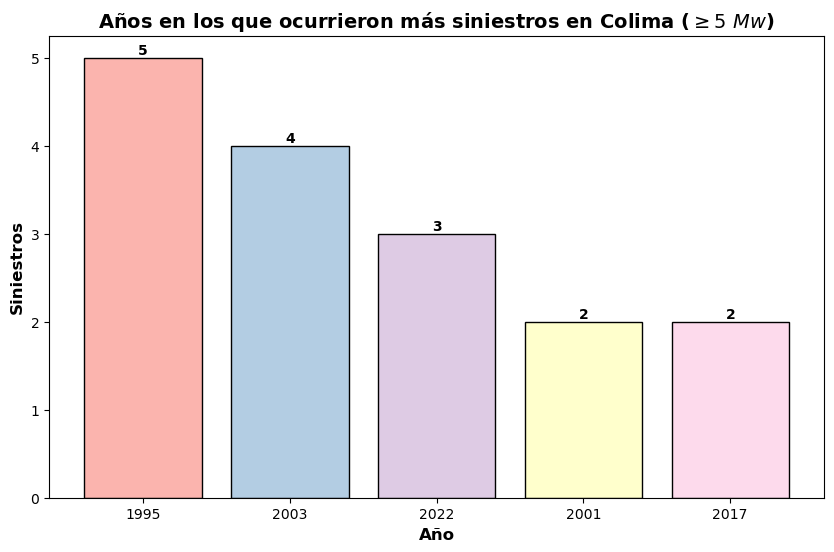

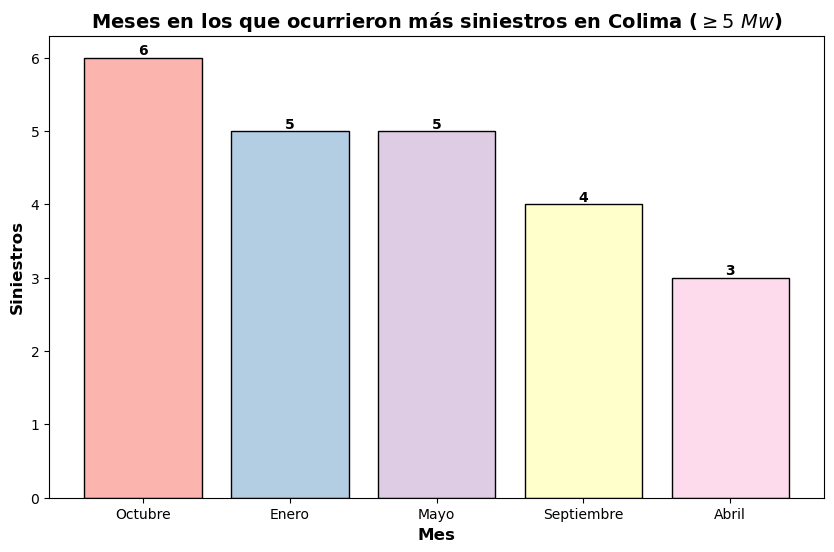

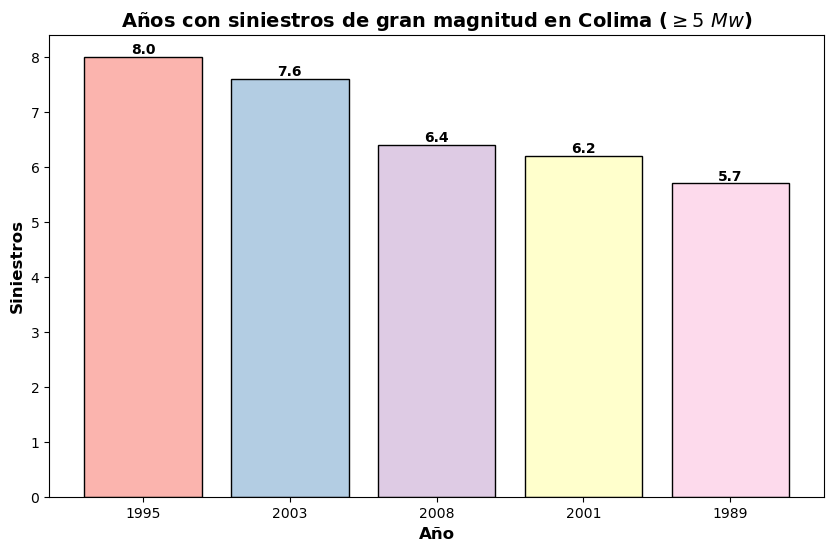

In [12]:
## Análisis de Siniestros
morethaneightys = morethaneightys.loc[morethaneightys['Estado'] == 'COL']

x = morethaneightys['Año']

y= morethaneightys['Magnitud']

# Normalizar los valores de magnitud en el rango [0, 1]
norm = Normalize(vmin=min(y), vmax=max(y))
normalized_y = norm(y)

# Crear el gráfico de dispersión con colores normalizados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=normalized_y, s=100 * np.random.rand(len(morethaneightys['Magnitud'])), alpha=0.7, cmap='Pastel1', edgecolors='black')

# Añadir título y etiquetas de los ejes
plt.title("Siniestros históricos en Colima ($\\geq 5 $ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Año", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Magnitud", fontsize=12, fontweight='bold', color='k')


# Crear un objeto ScalarMappable para crear la barra de colores
sm = ScalarMappable(cmap='Pastel1', norm=norm)
sm.set_array([])  # Necesario para la barra de colores

# Crear ejes para la barra de colores
cbar_axes = plt.colorbar(sm, label='Intensidad de magnitud', ax=plt.gca())

# Mostrar el gráfico
plt.show()

####
##################
topfiveyearcol= morethaneightys.loc[morethaneightys['Estado'] == 'COL'].groupby('Año').Siniestro.sum().sort_values(ascending=False)

x = topfiveyearcol.head(5).head(5).index
y = topfiveyearcol.head(5).values

# Crear colores distintos para cada barra con un mapa de colores pastel
colores_pastel = plt.cm.Pastel1(np.arange(len(x)) / len(x))

# Crear un gráfico de barras con colores pastel
plt.figure(figsize=(10, 6))

# Ajustar el ancho de las barras
bar_width = 0.8

# Añadir un pequeño desplazamiento a la posición de las barras para colocarlas lado a lado
bar_positions = np.arange(len(x))

bars = plt.bar(bar_positions, y, width=bar_width, color=colores_pastel, edgecolor='black')

# Añadir títulos y etiquetas
plt.title("Años en los que ocurrieron más siniestros en Colima ($\\geq 5$ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Año", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Siniestros", fontsize=12, fontweight='bold', color='k')

# Añadir valores encima de cada barra

for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Establecer ticks en el eje x con etiquetas de años
plt.xticks(bar_positions, x)

# Mostrar el gráfico
plt.show()
##########

topfivemonthcol= morethaneightys.loc[morethaneightys['Estado'] == 'COL'].groupby('Mes').Siniestro.sum().sort_values(ascending=False)

x = topfivemonthcol.head(5).head(5).index
y = topfivemonthcol.head(5).values

# Crear colores distintos para cada barra con un mapa de colores pastel
colores_pastel = plt.cm.Pastel1(np.arange(len(x)) / len(x))

# Crear un gráfico de barras con colores pastel
plt.figure(figsize=(10, 6))

# Ajustar el ancho de las barras
bar_width = 0.8

# Añadir un pequeño desplazamiento a la posición de las barras para colocarlas lado a lado
bar_positions = np.arange(len(x))

bars = plt.bar(bar_positions, y, width=bar_width, color=colores_pastel, edgecolor='black')

# Añadir títulos y etiquetas
plt.title("Meses en los que ocurrieron más siniestros en Colima ($\\geq 5$ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Mes", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Siniestros", fontsize=12, fontweight='bold', color='k')

# Añadir valores encima de cada barra

for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Establecer ticks en el eje x con etiquetas de años
plt.xticks(bar_positions, x)

# Mostrar el gráfico
plt.show()
##########

topfiveyearcol= morethaneightys.loc[morethaneightys['Estado'] == 'COL'].groupby('Año').Magnitud.max().sort_values(ascending=False)

x = topfiveyearcol.head(5).head(5).index
y = topfiveyearcol.head(5).values

# Crear colores distintos para cada barra con un mapa de colores pastel
colores_pastel = plt.cm.Pastel1(np.arange(len(x)) / len(x))

# Crear un gráfico de barras con colores pastel
plt.figure(figsize=(10, 6))

# Ajustar el ancho de las barras
bar_width = 0.8

# Añadir un pequeño desplazamiento a la posición de las barras para colocarlas lado a lado
bar_positions = np.arange(len(x))

bars = plt.bar(bar_positions, y, width=bar_width, color=colores_pastel, edgecolor='black')

# Añadir títulos y etiquetas
plt.title("Años con siniestros de gran magnitud en Colima ($\\geq 5$ $Mw$)", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Año", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Siniestros", fontsize=12, fontweight='bold', color='k')

# Añadir valores encima de cada barra

for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Establecer ticks en el eje x con etiquetas de años
plt.xticks(bar_positions, x)

# Mostrar el gráfico
plt.show()


## Es increíble lo útiles e informativos que pueden ser los datos libres cuando se combinan con tecnologías de análisis. 

Datos obtenidos del Servicio Sismologico Nacional (SSN) (2023).